# Linear Algebra and Differential Equations Review

We'll go through the linear algebra and differential equations topics you need to know to understand the theory behind machine learning algorithms.

### Table of Contents
1. [Linear Algebra](#linalg)
2. [Differential Equations](#de)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)
get_colors = lambda length: plt.get_cmap('Spectral')(np.linspace(0, 1.0, length))

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

---
# Linear Algebra<a id='linalg'></a>

## Preliminaries

A [Hilbert Space](https://en.wikipedia.org/wiki/Hilbert_space#Definition) $H$ is a real / complex [inner product space](https://en.wikipedia.org/wiki/Inner_product_space) (A Vector Space with the inner product defined). [Eucliden Space](https://en.wikipedia.org/wiki/Euclidean_space) is a type of Hilbert Space and it is represented by the Real Coordinate Space $\mathcal{R}^n$, the set of all possible real-valued $n$-tuples (ordered sequence of real-valued scalars), where $n$ is the number of dimensions.

### Position / Location Vectors Vs. Spatial / Euclidean Vectors

In the real coordinate space $\mathcal{R}^n$, where $n$ is the number of dimensions, a **vector in standard position**, AKA a **position vector**, AKA a **location vector** $\mathbf{r} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$ is one that starts from the origin ${(0 , \ldots, 0)}$ and ends at the coordinates ${(x_1 , \ldots, x_n)}$. If however, the vector does not start at the standard position / origin, it is called a **spatial vector**, AKA a **euclidean vector**.

### Inner Products and Projections in $\mathcal{R}^n$

Euclidean / $l_2$ Norm: $\|\vec{x}\|_2 = \sqrt{x_1^2 + \cdots + x_n^2}$

Cosine similarity: $cos\theta = \frac{\vec{a} \cdot \vec{b} }{\|\vec{a}\|_2 \|\vec{b}\|_2}$

Standard Inner Product (Dot Product): $\vec{a} \cdot \vec{b} = \mathbf{a}^\top \mathbf{b}$

Inner Product: $\left\langle
    \begin{bmatrix} a_0 \\ \vdots \\ a_n \end{bmatrix},
    \begin{bmatrix} b_0 \\ \vdots \\ b_n \end{bmatrix}
    \right\rangle$
    
The Un-normalized Cosine Similarity = Dot Product, and the dot product is a special case of the Inner Product. There are [alternative inner products](http://mathonline.wikidot.com/vector-dot-product-euclidean-inner-product#toc4) that can be defined in Euclidean Space.

Projections:
- Scalar Projection of $\vec{b}$ onto $\vec{a}$, AKA component of $\vec{b}$ in direction of $\vec{a}$ $\rightarrow comp_{\vec{a} }\vec{b} = \|\vec{b}\|_2cos\theta = \frac{\vec{a} \cdot \vec{b} }{\|\vec{a}\|_2}$
- Vector Projection of $\vec{b}$ onto $\vec{a}$ is just the scalar projection multiplied by the unit vector of $\vec{a}$ $\rightarrow projection_{\vec{a} }\vec{b} = \|\vec{b}\|_2cos\theta * \frac{\vec{a} }{\|\vec{a}\|_2} = \frac{\vec{a} \cdot \vec{b} }{\|\vec{a}\|_2} * \frac{\vec{a} }{\|\vec{a}\|_2}$

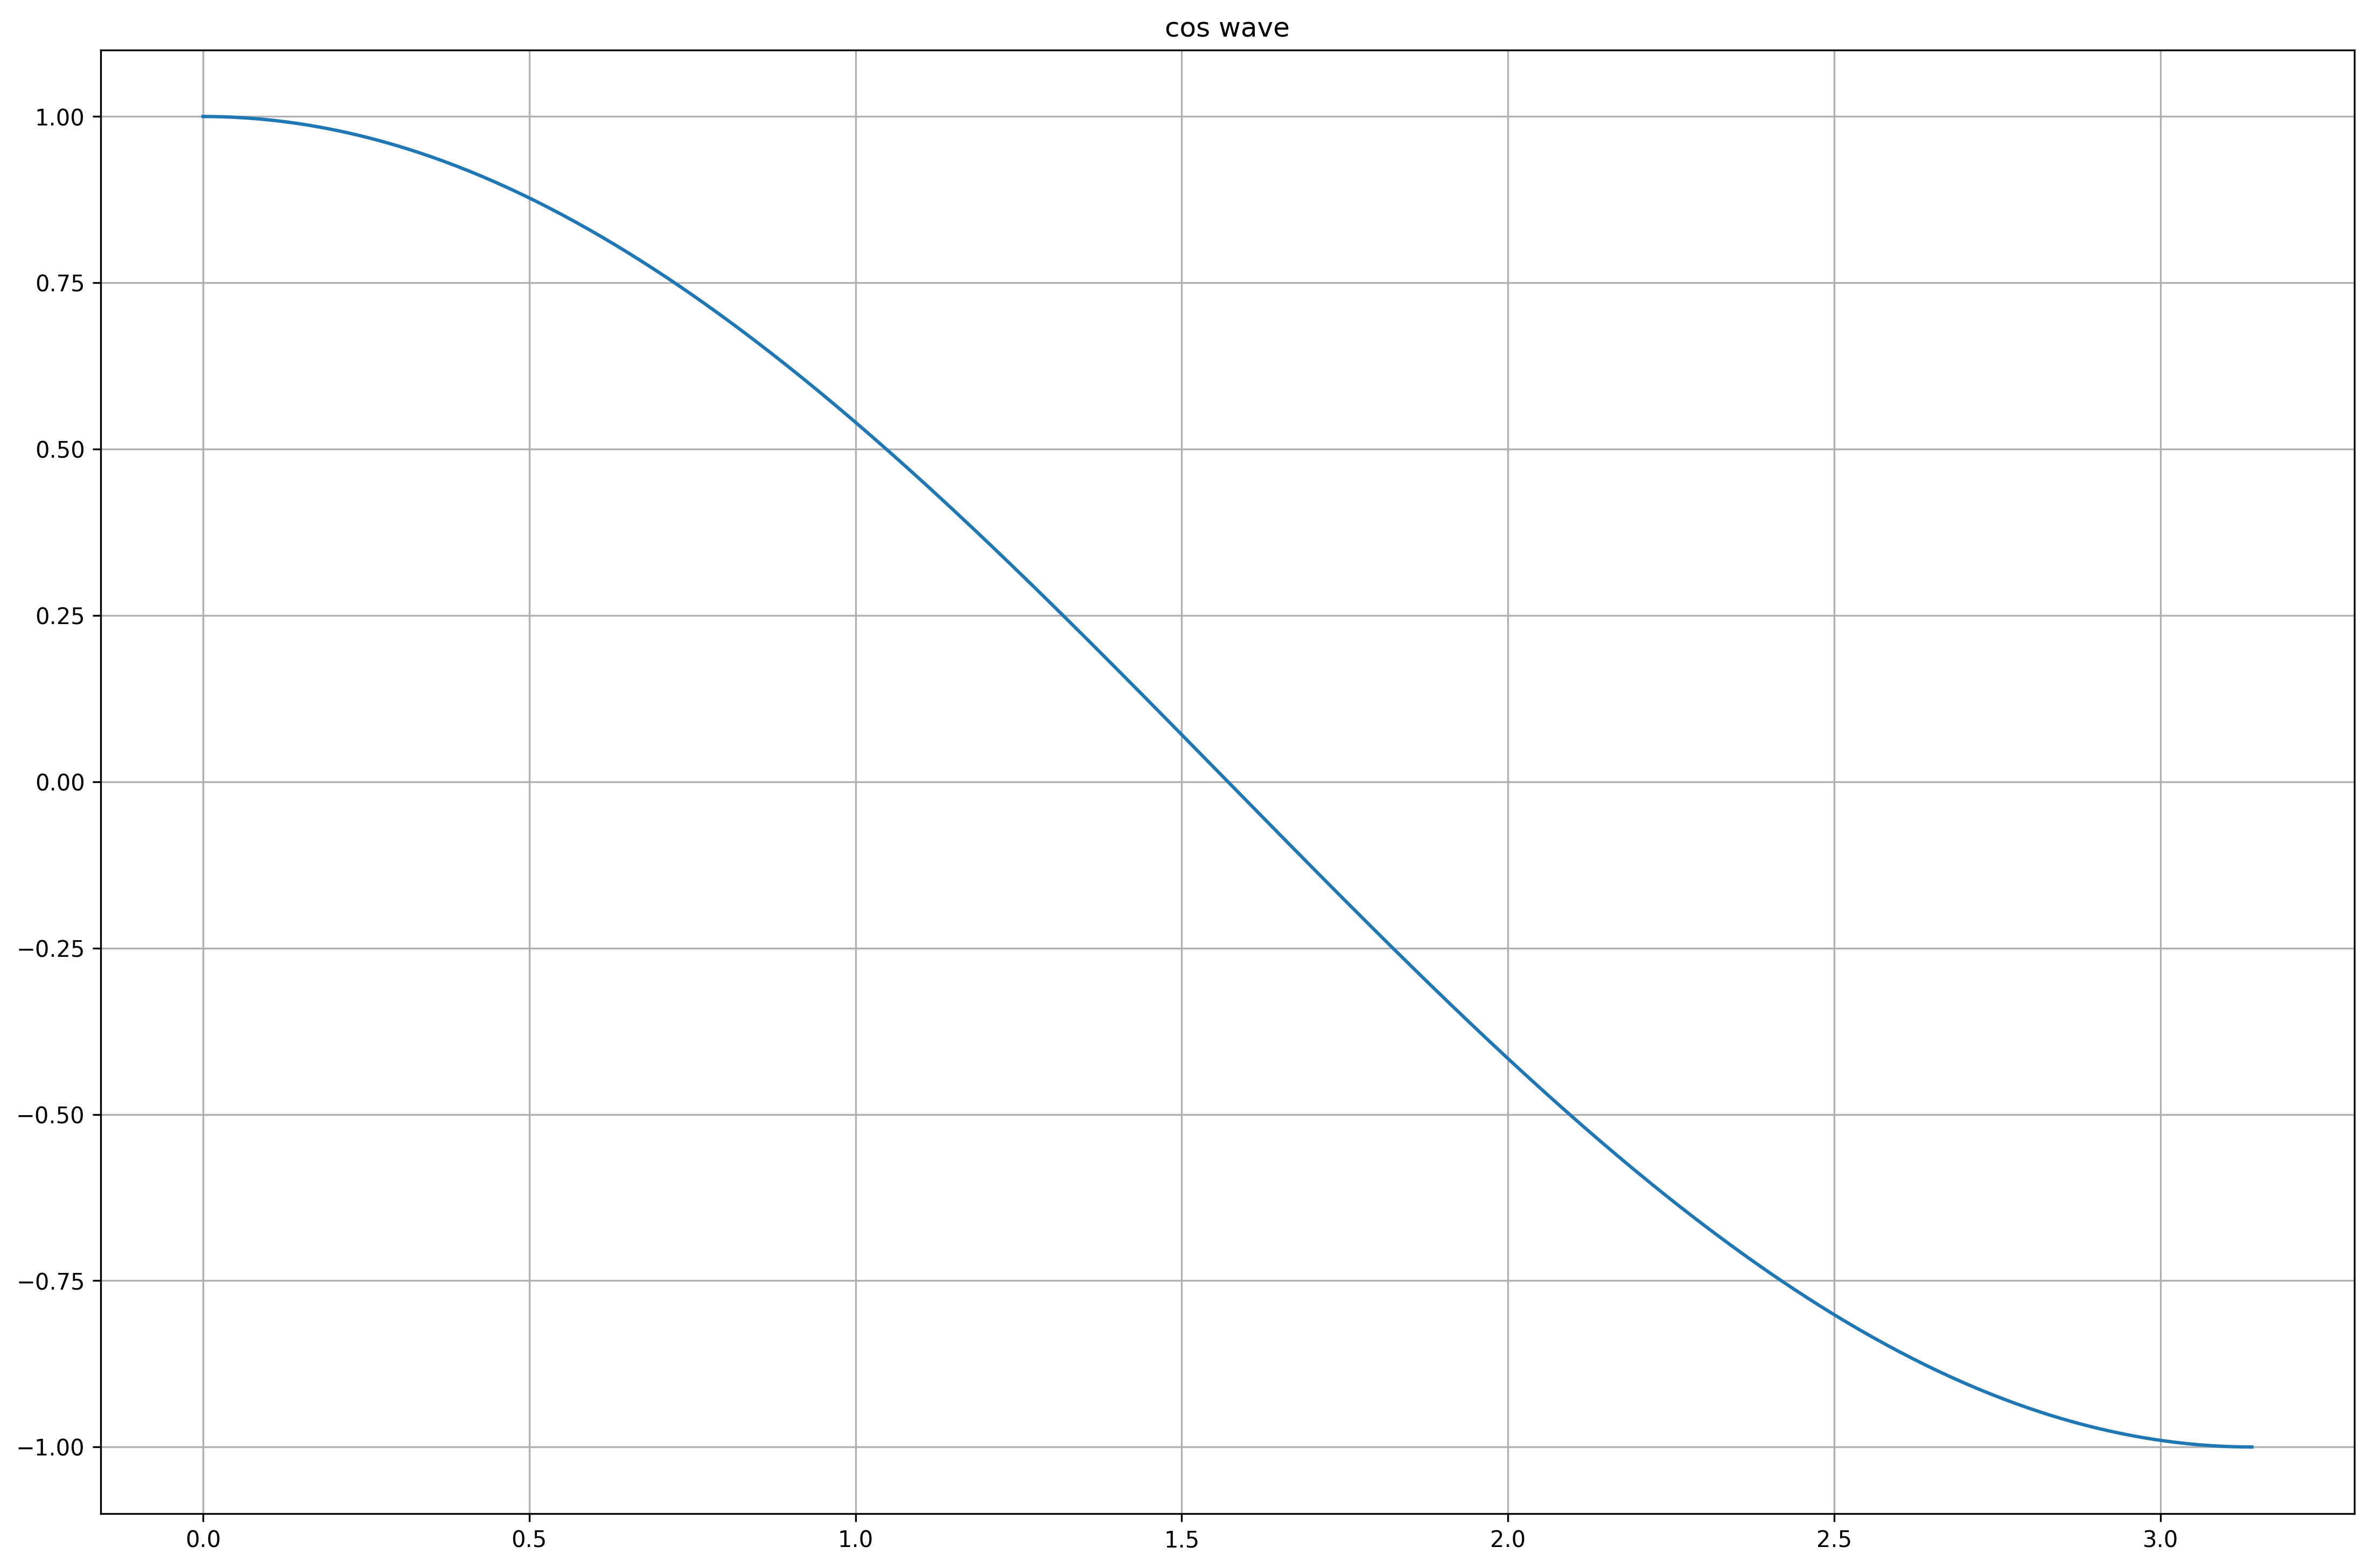

In [3]:
plt.plot(np.arange(0, np.pi, 0.01), np.cos(np.arange(0, np.pi, 0.01)))
plt.grid()
plt.title('cos wave')
plt.show();

### Standard Form of Equation for Hyperplane

Back in highschool, we learnt that a line in 2-D Cartesian plane is denoted by 
$$
y=mx+b
$$
, where $y$ is the vertical axis, $x$ is the horizonatal axis, $m$ is the slope of the line, and $b$ is the y-intercept.

However, now in the world of linear algebra, we learn that the **standard form** of any hyperplane (*A subspace of one dimension less than its ambient space, e.g. line in 2-D is a hyperplane, plane in 3-D is a hyperplane too*) is 

$$
{w_n}{x_n} + {w_{n - 1}{x_{n - 1} } } + ... + {w_0}{x_0} = 
\begin{bmatrix} {w_n}, {w_{n - 1} }, ..., {w_0} \end{bmatrix}
\begin{bmatrix} {x_n} \\ {x_{n - 1} } \\ \vdots \\ {x_0} \end{bmatrix} = \mathbf{w}^\top\mathbf{x} = b\,\text{, where }b=0\,\text{if hyperplane passes through the origin}
$$

In general, given an $N$-dimensional space, we need $N-P$ equations like $\sum_i^n w_i x_i = b$ to define an object of $P$ dimensions.

Hence, in 2-D Cartesian plane, to define a 1-D line, we need just $(N=2) - (P=1) = 1$ equation:
$$
\begin{aligned}
y&=mx+b\,\text{, assuming}\,b \not= 0 \\
y-mx&=b \\
(-m)*(x)+(1)*(y)&=b \\
\begin{bmatrix} -m, 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} &= b \\
\mathbf{w}^\top\mathbf{x} &= b
\end{aligned}
$$

Notice that from the same equation, if we push the non-zero b into the LHS, we can create a hyperplane that passes through the origin but doing this increases our dimensions by 1:
$$
\begin{aligned}
y&=mx+b \\
y-mx-b&=0 \\
(1)*(y)+(-m)*(x)+(-b)*(1)&=0 \\
\begin{bmatrix} 1, -m, -b \end{bmatrix}
\begin{bmatrix} y \\ x \\ 1 \end{bmatrix}&=\mathbf{w}^\top\mathbf{x}=0
\end{aligned}
$$

Because of this, we can always translate all the data points horizontally and vertically such that the hyperplane passes through the origin, however increasing our dimensionality by 1. 

*This is a very important point as it allows us to fix this form $\rightarrow \mathbf{w}^\top\mathbf{x} = 0$ as the equation of a hyperplane. Furthermore, it much better sense now when we talk about why all the points on the hyperplane, $\forall{i} \vec{x_i}$, are orthogonal to $\vec{w}$, making their dot product / inner product / un-normalized cosine similarity $= 0$. $\mathbf{w}$ is also known as the **normal** vector and it uniquely defines the hyperplane.*
- To find the normal vector $\mathbf{w}$, we need to cross two **spatial** vectors that are in the hyperplane (unless our hyperplane passes through the origin, which means we can either use **spatial** or **position** vectors since both lie on the plane):
    - Given that 3 points lie on a plane: $p_0 = \begin{bmatrix} 1, 2, 3 \end{bmatrix}$, $p_1 = \begin{bmatrix} 4, -1, 2 \end{bmatrix}$, $p_2 = \begin{bmatrix} 2, 0, 4 \end{bmatrix}$, we can't just do the cross product of 2 of the points to find the normal vector as those position vectors are not on the hyperplane because the hyperplane does not pass through the origin. We therefore need to find the spatial vectors on the hyperplane by subtracting any 2 unique combinations of the points on hyperplane / position vectors $p_0, p_1, p_2$ and crossing them to get the normal. This example is shown below:

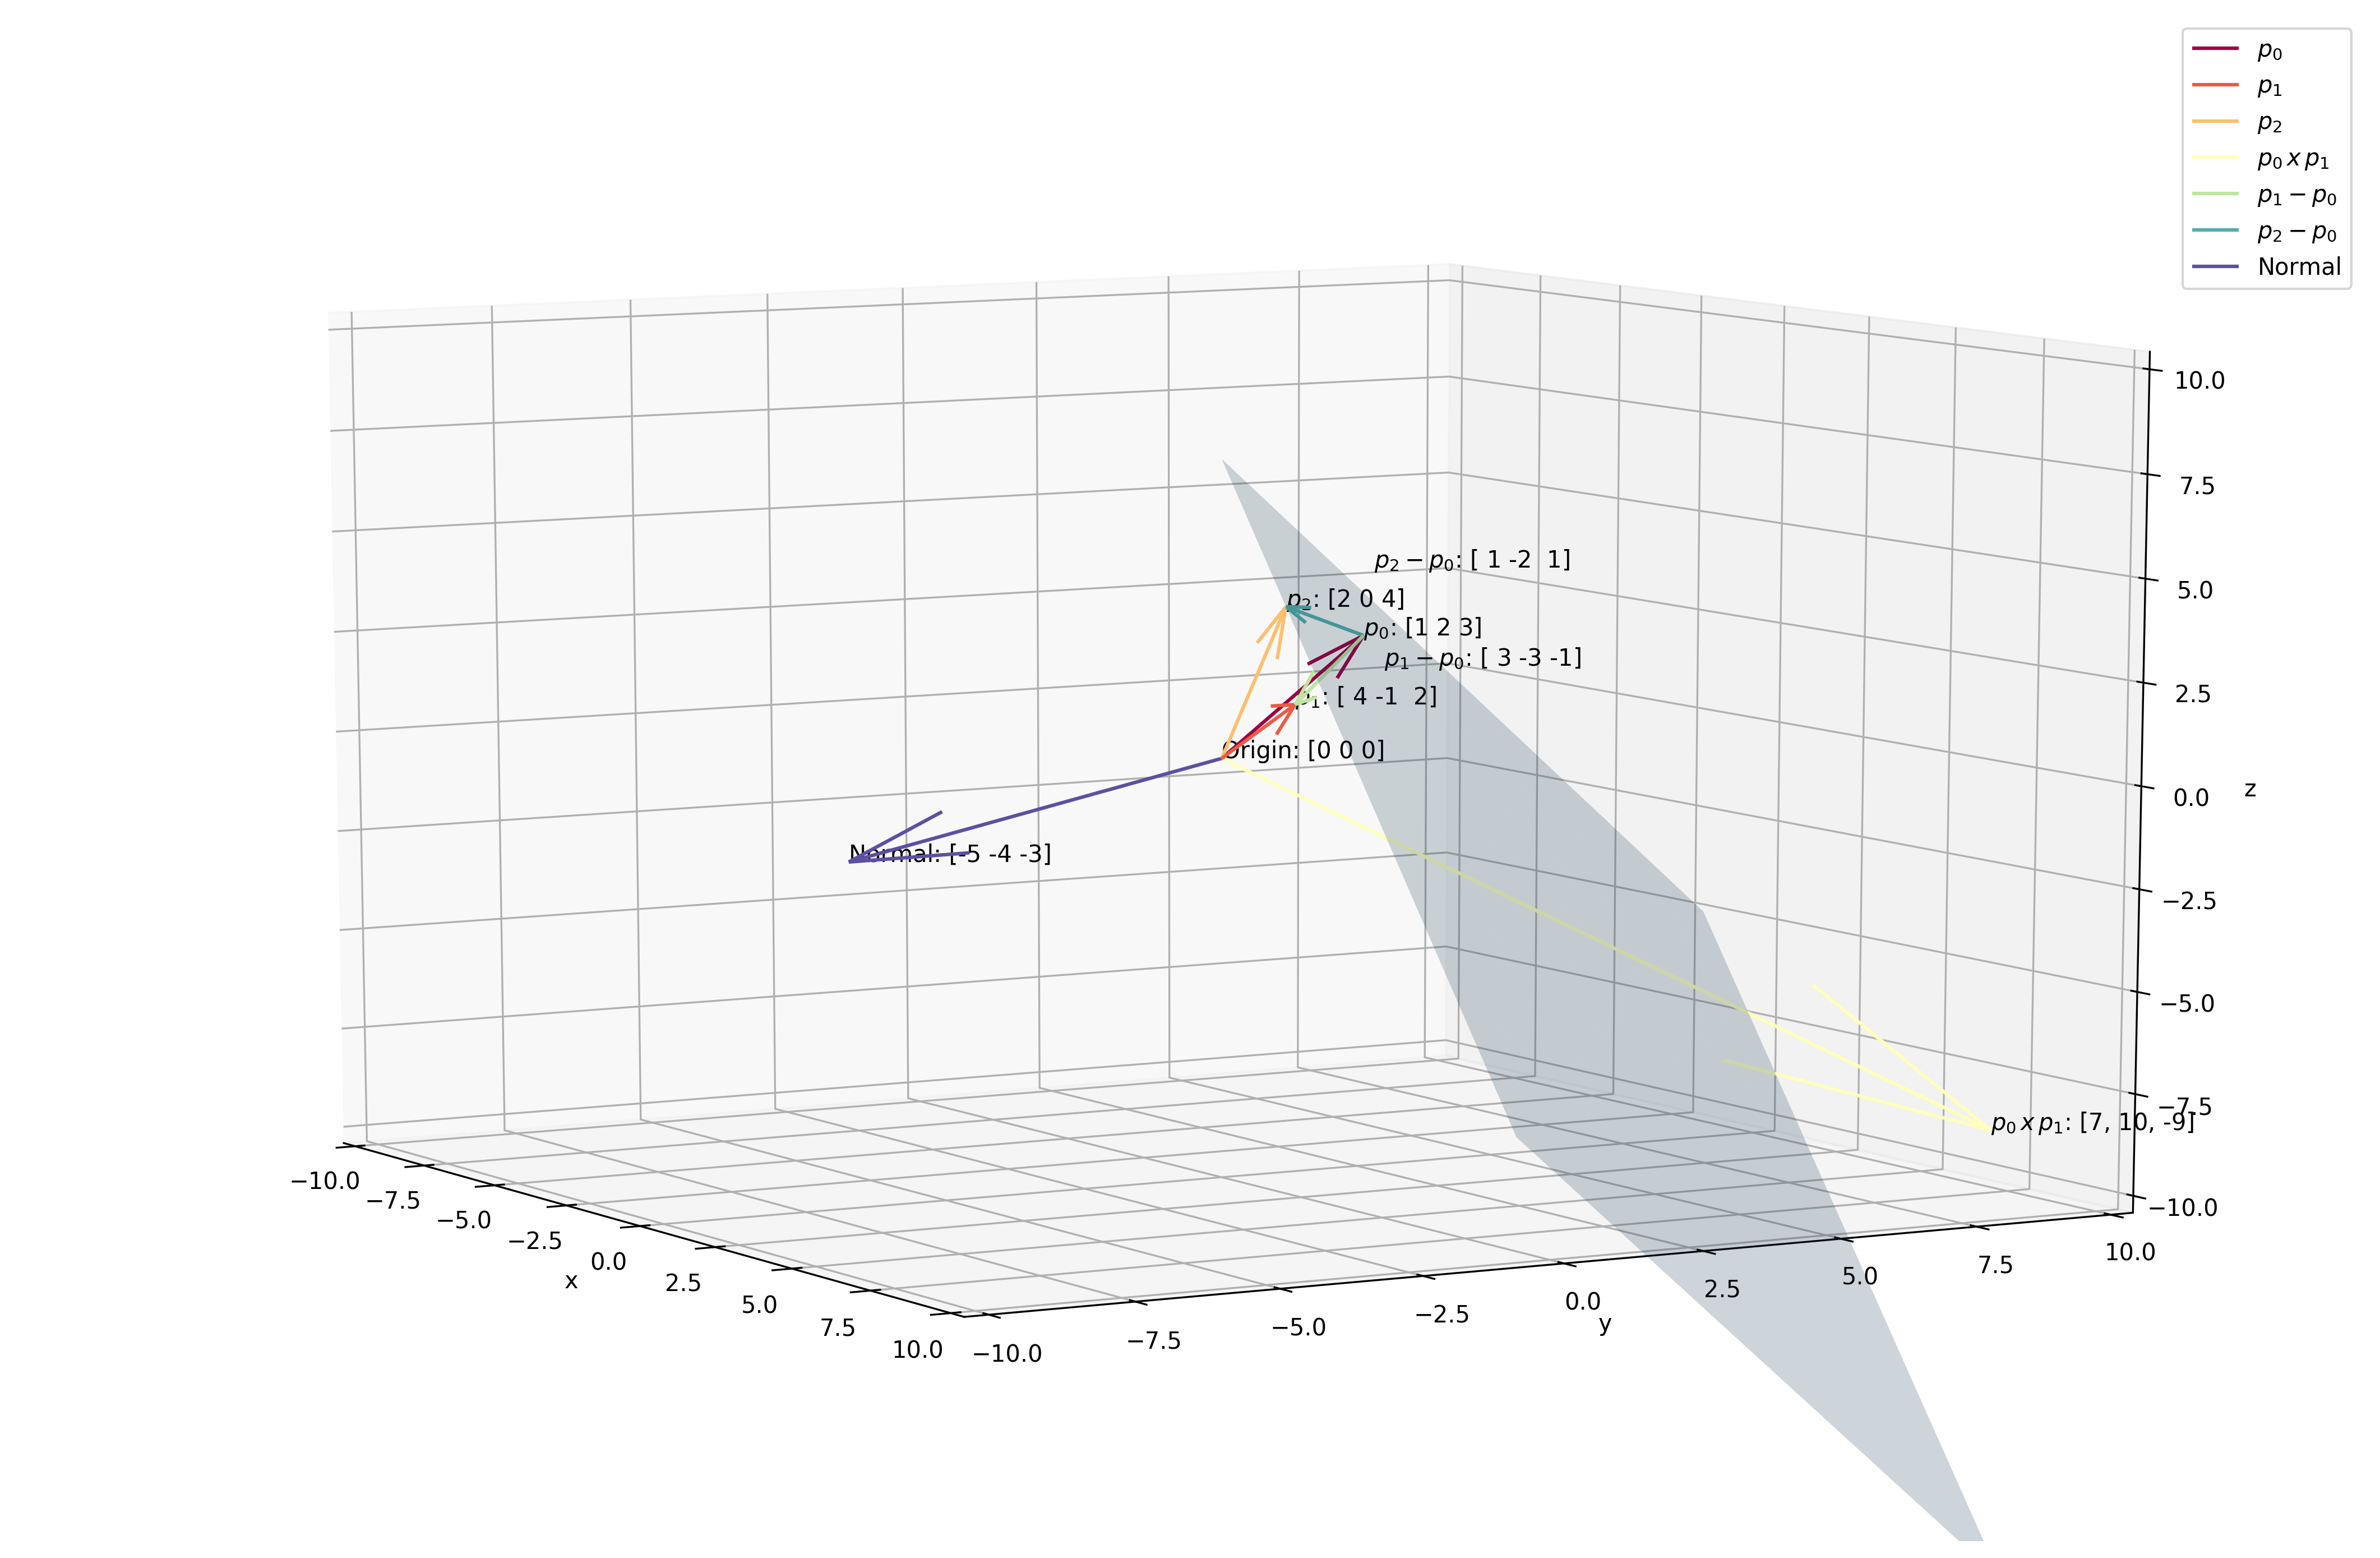

In [83]:
# Vector coordinates
p0, p1, p2, origin = \
    np.array([1,2,3]), \
    np.array([4,-1,2]), \
    np.array([2,0,4]), \
    np.array([0,0,0])

# Normal Vector for plane passing through p0, p1, p2
# by getting cross product of spatial vectors p1-p0
# and p2-p0 that lie on the plane
normal = np.cross(p1-p0, p2-p0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = get_colors(7)

# Plot vectors
p0_quiver = ax.quiver(*origin, *p0, color=colors[0], label='$p_0$')
p1_quiver = ax.quiver(*origin, *p1, color=colors[1], label='$p_1$')
p2_quiver = ax.quiver(*origin, *p2, color=colors[2], label='$p_2$')
p0p1_cross_quiver = ax.quiver(*origin, *np.cross(p0, p1), color=colors[3], label='$p_0\,x\,p_1$')
p1_p0_quiver = ax.quiver(*p0, *p1-p0, color=colors[4], label='$p_1-p_0$')
p2_p0_quiver = ax.quiver(*p0, *p2-p0, color=colors[5], label='$p_2-p_0$')
normal_quiver = ax.quiver(*origin, *normal, color=colors[6], label='Normal')

# Annotate vectors
ax.text(*origin, s='{}'.format('Origin: '+str(origin)))
ax.text(*p0, s='{}'.format('$p_0$: '+str(p0)))
ax.text(*p1, s='{}'.format('$p_1$: '+str(p1)))
ax.text(*p2, s='{}'.format('$p_2$: '+str(p2)))
ax.text(*np.cross(p0, p1), s='{}'.format('$p_0\,x\,p_1$: '+str(list(np.cross(p0, p1)))))
ax.text(*p1+1, s='{}'.format('$p_1 - p_0$: '+str(p1-p0)))
ax.text(*p2+1, s='{}'.format('$p_2 - p_0$: '+str(p2-p0)))
ax.text(*normal, s='{}'.format('Normal: '+str(normal)))

# Plot plane
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -p0.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.2)

# Set viewing perspective
ax.view_init(10, -30)

# Set axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

In order to get the cartesian / standard equation for that hyperplane, we find the dot product of the normal vector with any of the points on the hyperplane / position vectors to get the $b$ of the standard form of a hyperplane equation.

Our Normal Vector: $\mathbf{w}^\top = \begin{bmatrix}-5, -4, -3\end{bmatrix}$

Our $b$: $\mathbf{w}^\top p_0 = \begin{bmatrix}-5 & -4 & -3\end{bmatrix} \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix} = (-5 * 1) + (-4 * 2) + (-3 * 3) = - 5 - 8 - 9 = - 22$

Our final **standard form** of hyperplane equation:
$$
P = \{\mathbf{x} \vert \mathbf{w}^\top \mathbf{x} = \begin{bmatrix}5 & 4 & 3\end{bmatrix} \begin{bmatrix}x_0 \\ x_1 \\ x_2\end{bmatrix} = 5x_0 + 4x_1 + 3x_2 = 22\}
$$

If we absorb the $b$, $P$ is a 2D object living in 4D:
$$
P = \{\mathbf{x} \vert \mathbf{w}^\top \mathbf{x} = \begin{bmatrix}5 & 4 & 3 & -22 \end{bmatrix} \begin{bmatrix}x_0 \\ x_1 \\ x_2 \\ 1 \end{bmatrix} = 5x_0 + 4x_1 + 3x_2 - 22 = 0\}
$$

Meaning of $\mathbf{w}^\top$: For different values of $b$, scalar multiples of $\mathbf{w}^\top$ will get us hyperplanes that are parallel to our original hyperplane.

Meaning of the $b$: Recall the cosine similarity definition of dot products - $\mathbf{w}^\top \mathbf{x} = \|\mathbf{w}^\top\|_2 \|\mathbf{x}\|_2 cos\theta = b$
- This means that the **standard form** of the equation of hyperplane is saying that all the position vectors / points on the hyperplane have the same "un-normalized cosine similarity".
- If we normalize $b$ by dividing it by $\|\mathbf{w}^\top\|_2$, we get $\mathbf{x}\|_2 cos\theta = \frac{b}{\|\mathbf{w}^\top\|_2 \|}$, or the component of position vector $\mathbf{x}$ in the direction of the unit normal / the plane's distance from the origin along its unit normal.

### Parametric Form of Equation for Hyperplane

The **parametric form** of equation for hyperplane is a general position vector that is a linear combination of 2 things:
1. Position Vector $\mathbf{p}_0$ / Point in hyperplane
2. Basis of the same hyperplane but passing through origin ($P$ direction / spatial vectors $\mathbf{d}_i$ that lie on the hyperplane for a hyperplane of $P$ dimensionality)

$$
\begin{aligned}
\mathbf{x} &= \mathbf{p}_0 + \alpha_0\mathbf{d}_0 + \alpha_1\mathbf{d}_1 + \ldots + \alpha_{P-1}\mathbf{d}_{P-1} \\
&= \mathbf{p}_0 + \sum_{i=0}^{P-1}\alpha_i\mathbf{d}_i \\
&= \mathbf{p}_0 + \begin{bmatrix} \vert & \vert & \vert & \vert \\ \mathbf{d}_0 & \mathbf{d}_1 & \ldots & \mathbf{d}_{P-1} \\ \vert & \vert & \vert & \vert \\ \end{bmatrix} \vec{\alpha} \\
&= \mathbf{p}_0 + D\vec{\alpha},\,\vec{\alpha}\in\mathcal{R}^P
\end{aligned}
$$

$\vec{\alpha}$ is a vector of free variables.

Following from the example in the section above, if we have 3 points lie on a plane: $p_0 = \begin{bmatrix} 1, 2, 3 \end{bmatrix}$, $p_1 = \begin{bmatrix} 4, -1, 2 \end{bmatrix}$, $p_2 = \begin{bmatrix} 2, 0, 4 \end{bmatrix}$, what's the parametric form of the hyperplane?

Since we already have 3 points on the plane / position vectors to the plane, our job is already 50% completed. We need to find a basis for the plane. Recall that in order to find the normal vector, we found 2 spatial vectors that lie on the hyperplane by $p_1 - p_0 = \begin{bmatrix} 4 \\ -1 \\  2 \end{bmatrix} - \begin{bmatrix} 1 \\ 2 \\  3 \end{bmatrix} = \begin{bmatrix} 3 \\ -3 \\ -1 \end{bmatrix}$ and $p_2 - p_0 = \begin{bmatrix} 2 \\ 0 \\  4 \end{bmatrix} - \begin{bmatrix} 1 \\ 2 \\  3 \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$. Hence, our parametric form is:

$$
\mathbf{x} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 3 & 1 \\ -3 & -2 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} = \left\{\begin{array}{lr}
x &= 1 + 3\alpha_0 + \alpha_1 \\
y &= 2 - 3\alpha_0 - 2\alpha_1 \\
z &= 3 - 1\alpha_0 + \alpha_1 \\
\end{array}\right\},\,\alpha_i\in\mathcal{R}
$$

OR 

$$
\mathbf{x} = \begin{bmatrix} 4 \\ -1 \\ 2 \end{bmatrix} + \begin{bmatrix} 3 & 1 \\ -3 & -2 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} = \left\{\begin{array}{lr}
x &= 4 + 3\alpha_0 + \alpha_1 \\
y &= - 1 - 3\alpha_0 - 2\alpha_1 \\
z &= 2 - 1\alpha_0 + \alpha_1 \\
\end{array}\right\},\,\alpha_i\in\mathcal{R}
$$

OR 

$$
\mathbf{x} = \begin{bmatrix} 2 \\ 0 \\ 4 \end{bmatrix} + \begin{bmatrix} 3 & 1 \\ -3 & -2 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} = \left\{\begin{array}{lr}
x &= 2 + 3\alpha_0 + \alpha_1 \\
y &= 0 - 3\alpha_0 - 2\alpha_1 \\
z &= 4 - 1\alpha_0 + \alpha_1 \\
\end{array}\right\},\,\alpha_i\in\mathcal{R}
$$

### [Invertible Matrix Theorem](https://www.math.dartmouth.edu/archive/m22f06/public_html/imt.pdf)

Let $A$ be an $n × n$ matrix. Then the following are equivalent:
1. The matrix $A$ is invertible (non-singular).
- The matrix $A$ is row equivalent to $I_n$.
- The matrix $A$ has $n$ pivot positions.
- The equation $A\mathbf{x} = 0$ has only the trivial solution.
- The columns of $A$ form a linearly independent set.
- The linear transformation $\mathbf{x} \rightarrow A\mathbf{x}$ is one-to-one.
- For each $\mathbf{b} \in \mathbb{R}^n$, the equation $A\mathbf{x} = b$ has a unique solution.
- The columns of $A$ span $\mathbb{R}^n$.
- The linear transformation $\mathbf{x} \rightarrow A\mathbf{x}$ is onto.
- There is an $n × n$ matrix $C$ such that $CA = I_n$.
- There is an $n × n$ matrix $D$ such that $AD = I_n$.
- The matrix $A^\top$ is invertible.
- The columns of $A$ form a basis for $\mathbb{R}^n$.
- The column space of $A$ is $\mathbb{R}^n$ (Col $A$ = $\mathbb{R}^n$).
- The dimension of the column space of $A$ is $n$ (dim Col $A$ = $n$).
- The rank of $A$ is $n$ (rank $A$ = $n$).
- The null space of $A$ is $\{0\}$ ($N(A)$ = $\{0\}$).
- The dimension of the null space of $A$ is 0 (dim $N(A)$ = 0).
- The number 0 is not an eigenvalue of $A$.
- The determinant of $A$ is not zero (det $A \not=$ 0).
- The orthogonal complement of the column space of $A$ is $\{0\}$ (${(Col A)}^\perp = \{0\}$).
- The orthogonal complement of the null space of $A$ is $\mathbb{R}^n$ (($N(A)^\perp = \mathbb{R}^n$).
- The row space of $A$ is $\mathbb{R}^n$ (Row $A$ = $\mathbb{R}^n$).
- The matrix $A$ had $n$ non-zero singular values.

### Cramer's Rule

Given a system $\mathbf{Ax = b}$, a unique solution $\mathbf{x}$ exists **iff** $\mathbf{A}$ is invertible

### [Gauss-Jordan Elimination and Reduced Row Echelon Form (RREF)](https://www.freetext.org/Introduction_to_Linear_Algebra/Systems_Linear_Equations/Gaussian_and_Gauss-Jordan_Elimination/)

### Rank-Nullity Theorem

### Homogeneous Systems of Linear Equations

Goal: Find a linear combination of vectors in the column space $C(A)$ such that they sum to the zero vector $\vec{0}$

Each equation in the row space $R(A)$ passes through the origin. Since we know that for homogeneous systems of linear equations, the graphs for each equation passes through the origin in the catesian plane

### Inhomogeneous Systems of Linear Equations

## Singular Value Decomposition (SVD)

## QR Decomposition (QR)

## LU Decomposition

---
# Differential Equations<a id='de'></a>

Differential equations are broken down into 2 types:
1. Ordinary Differential Equations (ODE)
    - Derivatives w.r.t. only 1 independent variable
2. Partial Differential Equations (PDE)
    - Derivatives w.r.t. multiple independent variables

## 1st Order Equations

## 2nd Order Equations

## Graphical and Numerical Methods

## Vector Spaces and Subspaces

## Eigenvalues and Eigenvectors

## Applied Mathematics and $A^\top A$

## Fourier and Laplace Transforms

---
## Resources:
- [Why $\mathbf{X}^T \mathbf{X}$ is always positive semi-definite](https://statisticaloddsandends.wordpress.com/2018/01/31/xtx-is-always-positive-semidefinite/)
- [Dot Products and Projections](https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/dotprod/dotprod.html)
- [Understanding what $\mathbf{w}$ is and why $y =mx + b$ <=> $\mathbf{w}^\top\mathbf{x}=0$](https://www.youtube.com/watch?v=3qzWeokRYTA)
- [Learn Differential Equations: Up Close with Gilbert Strang and Cleve Moler on MIT Opencourseware](https://ocw.mit.edu/resources/res-18-009-learn-differential-equations-up-close-with-gilbert-strang-and-cleve-moler-fall-2015/index.htm)
- [Freetext's Introduction to Linear Algebra](https://www.freetext.org/Introduction_to_Linear_Algebra/)